In [1]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
env = gym.make('MountainCar-v0')

In [2]:
testDyna = DynaAgent(env)

-----------variables--------
number of positions = 71
number of velocity = 28
number of states = 1988
self.discretization_position = [-1.2        -1.17464789 -1.14929577 -1.12394366 -1.09859155 -1.07323944
 -1.04788732 -1.02253521 -0.9971831  -0.97183099 -0.94647887 -0.92112676
 -0.89577465 -0.87042254 -0.84507042 -0.81971831 -0.7943662  -0.76901408
 -0.74366197 -0.71830986 -0.69295775 -0.66760563 -0.64225352 -0.61690141
 -0.5915493  -0.56619718 -0.54084507 -0.51549296 -0.49014085 -0.46478873
 -0.43943662 -0.41408451 -0.38873239 -0.36338028 -0.33802817 -0.31267606
 -0.28732394 -0.26197183 -0.23661972 -0.21126761 -0.18591549 -0.16056338
 -0.13521127 -0.10985915 -0.08450704 -0.05915493 -0.03380282 -0.0084507
  0.01690141  0.04225352  0.06760563  0.09295775  0.11830986  0.14366197
  0.16901408  0.1943662   0.21971831  0.24507042  0.27042254  0.29577465
  0.32112676  0.34647887  0.37183099  0.3971831   0.42253521  0.44788732
  0.47323944  0.49859155  0.52394366  0.54929577  0.57464789  0.6

In [3]:
total_reward = testDyna.run(num_episodes=3000)

 46%|████▋     | 1395/3000 [52:48<1:11:41,  2.68s/it]c:\Users\danib\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 88%|████████▊ | 2647/3000 [1:22:06<10:56,  1.86s/it]  


KeyboardInterrupt: 

In [5]:
testDyna.freq_actions

[335129, 96417, 97868]

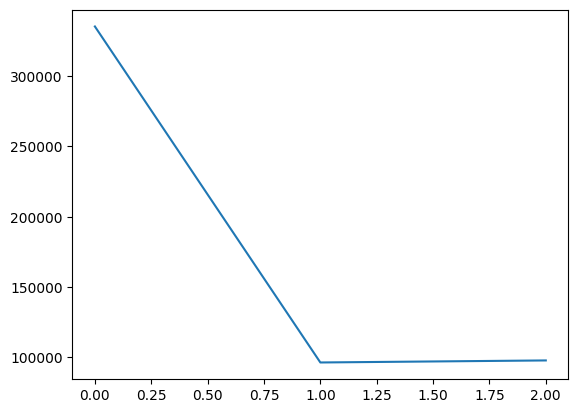

In [6]:
plt.plot(testDyna.freq_actions)

In [ ]:
dis = [1.234, 0.007]
print(f"dani/{str(dis)}")